# **Configurações iniciais** 

In [5]:
# importando os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importando o Prophet
from fbprophet import Prophet
import logging
logging.getLogger().setLevel(logging.ERROR)


import warnings
warnings.simplefilter('ignore')


In [6]:
dt = pd.read_excel('time_series_data.xlsx')

In [7]:
dt.head()

,produto_descricao,produto_quantidade,produto_unidade_comercial,produto_valor_unitario_comercializacao,nota_data_emissao
0,A0,23568,UN,14.13,20210420
1,A0,25082,UN,14.13,20210420
2,A0,25430,UN,14.13,20210922
3,A0,25463,UN,12.84,20210209
4,A0,25800,UN,12.84,20210209


In [8]:
dt.tail()

,produto_descricao,produto_quantidade,produto_unidade_comercial,produto_valor_unitario_comercializacao,nota_data_emissao
4455,B3,60,UN,3.1500,20210125
4456,B3,85,UN,3.1500,20210120
4457,B0,11400,UN,4.6477,20210226
4458,B0,22800,UN,4.6477,20210226
4459,A5,100,KG,29.5000,20201110


# **Preparação dos Dados** 

## Valores numéricos

In [9]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4460 entries, 0 to 4459
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   produto_descricao                       4460 non-null   object 
 1   produto_quantidade                      4460 non-null   int64  
 2   produto_unidade_comercial               4460 non-null   object 
 3   produto_valor_unitario_comercializacao  4460 non-null   float64
 4   nota_data_emissao                       4460 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 174.3+ KB


In [10]:
# Usando adequadamente a conversão para datetime da coluna nota_data_emissao, com intuito de abranger a possibilidade de trababalhar com a data 

dt.nota_data_emissao = pd.to_datetime(dt.nota_data_emissao, format="%Y%m%d")

In [11]:
dt['ano_emissao'] = dt.nota_data_emissao.dt.year
dt['dia_emissao'] = dt.nota_data_emissao.dt.day
dt['mes_emissao'] = dt.nota_data_emissao.dt.month

In [12]:
#dt = dt.drop(columns=['nota_data_emissao'])

In [13]:
dt.head()

,produto_descricao,produto_quantidade,produto_unidade_comercial,produto_valor_unitario_comercializacao,nota_data_emissao,ano_emissao,dia_emissao,mes_emissao
0,A0,23568,UN,14.13,2021-04-20,2021,20,4
1,A0,25082,UN,14.13,2021-04-20,2021,20,4
2,A0,25430,UN,14.13,2021-09-22,2021,22,9
3,A0,25463,UN,12.84,2021-02-09,2021,9,2
4,A0,25800,UN,12.84,2021-02-09,2021,9,2


## Padronização 

In [14]:
## verificando campo com nomes dos produtos
dt.produto_descricao.unique()

array(['A0', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'B0',
       'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'C0', 'C1',
       'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'D0', 'D1'],
      dtype=object)

In [15]:
## verificando campo com as unidades dos produtos
dt.produto_unidade_comercial.unique()

array(['UN', 'MG', 'KG', 'MI', 'FR'], dtype=object)

## Valores ausentes

In [16]:
dt.isnull().sum()

produto_descricao                         0
produto_quantidade                        0
produto_unidade_comercial                 0
produto_valor_unitario_comercializacao    0
nota_data_emissao                         0
ano_emissao                               0
dia_emissao                               0
mes_emissao                               0
dtype: int64

##  Duplicação

In [107]:
dt.duplicated().value_counts()

False    3827
True      633
dtype: int64

In [108]:
dt = dt.drop_duplicates()

## Outliers

In [20]:
dt.describe()

,produto_quantidade,produto_valor_unitario_comercializacao,ano_emissao,dia_emissao,mes_emissao
count,4460.000000,4460.000000,4460.000000,4460.000000,4460.000000
mean,424.202242,20.508176,2020.815471,17.249776,6.363229
std,2036.972760,44.426198,0.387959,8.530695,3.240580
min,0.000000,0.620000,2020.000000,1.000000,1.000000
25%,45.000000,8.380000,2021.000000,10.000000,3.000000
50%,72.000000,11.420000,2021.000000,18.000000,7.000000
75%,183.000000,27.200000,2021.000000,25.000000,9.000000
max,42000.000000,1812.390400,2021.000000,31.000000,12.000000


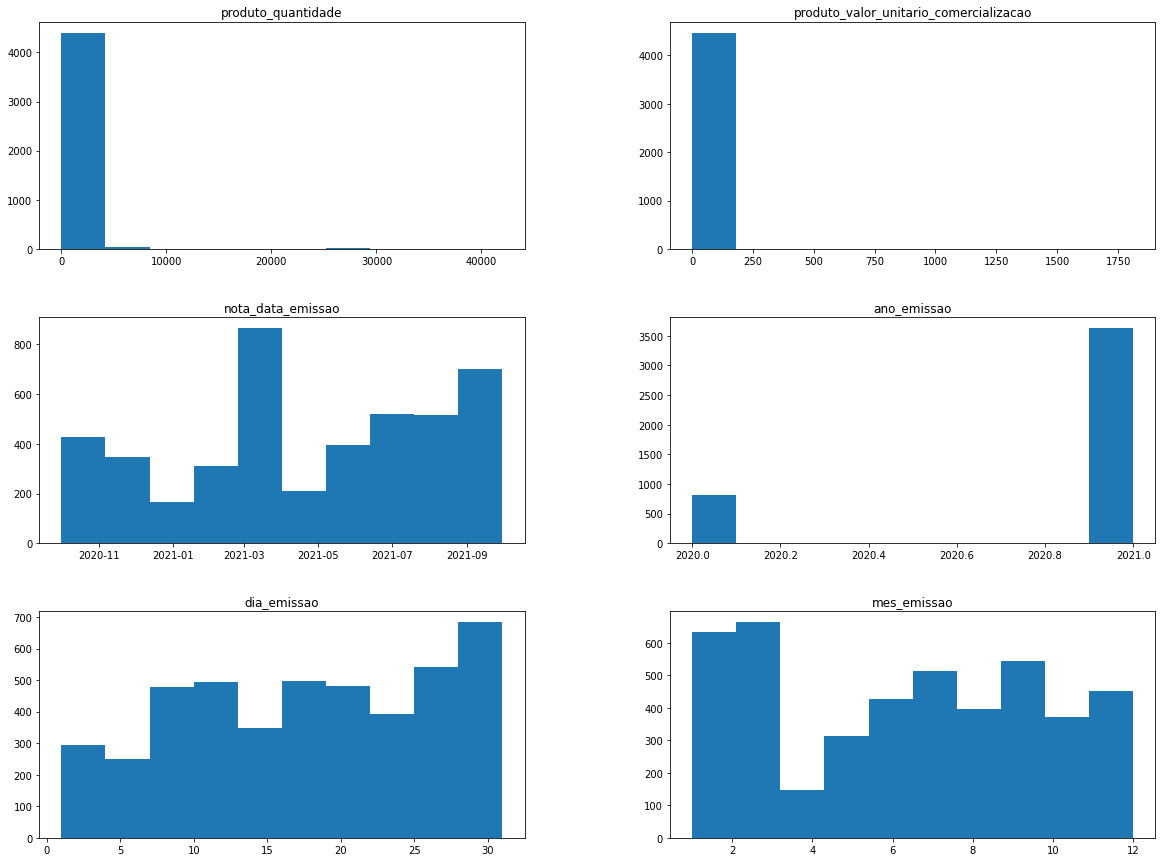

In [21]:
# verificando as distribuições
dt.hist(figsize=(20,15), grid=False);

# **Análise Exploratória** 

In [22]:
dt['produto_descricao'].value_counts()

B0    1000
B3     887
B2     778
A8     662
B1     536
B4     307
A9     141
D0      33
A0      32
B6      17
A7      14
A5       8
B7       6
A6       6
C5       4
C3       3
C0       3
C1       3
B8       2
B5       2
C2       2
C7       2
C9       2
D1       2
B9       1
A1       1
A3       1
C4       1
A4       1
C6       1
C8       1
A2       1
Name: produto_descricao, dtype: int64

In [23]:
data_B0 = dt[dt['produto_descricao'] == 'B0']

In [24]:
data_B0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 52 to 4458
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   produto_descricao                       1000 non-null   object        
 1   produto_quantidade                      1000 non-null   int64         
 2   produto_unidade_comercial               1000 non-null   object        
 3   produto_valor_unitario_comercializacao  1000 non-null   float64       
 4   nota_data_emissao                       1000 non-null   datetime64[ns]
 5   ano_emissao                             1000 non-null   int64         
 6   dia_emissao                             1000 non-null   int64         
 7   mes_emissao                             1000 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 70.3+ KB


In [25]:
data_B0.groupby(data_B0['nota_data_emissao'])['produto_quantidade'].sum()

nota_data_emissao
2020-10-01     120
2020-10-02      14
2020-10-05       1
2020-10-07      30
2020-10-08       1
              ... 
2021-09-26     600
2021-09-27     180
2021-09-28    2400
2021-09-29     420
2021-09-30     720
Name: produto_quantidade, Length: 202, dtype: int64

In [26]:
data_B0.groupby(data_B0['ano_emissao'])['produto_quantidade'].sum()

ano_emissao
2020     78447
2021    559483
Name: produto_quantidade, dtype: int64

# Modelagem

## Prophet

### Testes Estatísticos
um pré-requisito para que possamos fazer previsões em cima de uma TS é ela ser estacionária.

De maneira simplificada, ser estacionária significa ter a **média, variância e covariância** permanecendo **constante** ao longo da dimensão temporal. Vamos entender visualmente o que isso significa.

<center>
<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2018/09/ns5-e1536673990684.png" width="50%"></center>

No primeiro plot, há uma tendência de alta. Ou seja, a sua média está aumentando conforme o tempo passa. No segundo plot, apesar de não haver uma variação na tendência, a variância (não constante) está interferindo na sua amplitude. Por fim, o último exibe o comportamento típico de quando a covariância varia em função do tempo.

**E como se pareceria uma série estacionária?**

Uma TS com média, variância e covariância constante seria parecida com o plot abaixo.

<center><img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2018/09/ns6-e1536674898419.png" width="20%"></center>

**Como verificar se uma TS é estacionária?**

Há muitas maneiras se fazer essa verificação. Por exemplo:

* **Olhar os plots -** Em muitos casos, durante a análise exploratória você já vai identificar visualmente se uma TS é estacionária ou não.
* **Resumo estatístico -** Você pode gerar um resumo com as principais informações estatísticas da TS, e verificar se há algum indício da estacionaridade.
* **Testes estatísticos -** São testes que possuem a capacidade de nos dizer se uma TS é estacionária ou não, sempre se baseando em métodos científicos.

Nesta projeto, mais pra frente, realizaremos um teste estatístico específico para identificar se nossa TS é estacionária ou não, o teste ***Augmented Dickey Fuller (ADF)***

### Teste ADF

O ADF é um dos testes estatísticos mais usados para TS. Suas hipóteses nula e alternativa são:

* A Hipótese Nula ($H_0$) do teste é que a TS **não é estacionária**. Ou seja, possui algum tipo de dependência em relação ao tempo.
* A Hipótese Alternativa ($H_1$) **rejeita a hipótese nula**, ou seja, que a TS é estacionária.

Vamos ver como isso vai acontecer no nosso projeto específico.

### Teste ADF

Vamos fazer o teste para descobrir se nossa série é estacionária. O teste utilizado será o ***Augmented Dickey Fuller (ADF)***.

Como bem disse o Carlos:
> Normalmente, rejeitamos $H_0$ quando o *p-value* é menor ou igual a um determinado nível de significância. Normalmente, esse nível de significância é igual a 0.01 (1%), 0.05 (5%) ou até mesmo 0.1 (10%).

> Quanto menor o *p-value*, mais evidências contra a hipótese nula você tem. Por exemplo, caso seja usado $\text{p-value} = 0.05$, rejeitamos a $H_0$ com um nível de confiança de 95%. 

> Caso o valor do teste fique acima do *threshold*, falharemos em rejeitar a hipótese nula. **Atenção, isso não significa que $H_0$ é verdadeira.** Significa apenas que o experimento não encontrou evidências para rejeitá-la.

Vamos ver como a nossa série se sai.

In [127]:
# Soma de quantidade de produtos vendidos por data de emissão e criação de novo dataframe
dat_B0 = data_B0.groupby('nota_data_emissao')['produto_quantidade'].sum().reset_index()  

In [128]:
# importanto o pacote
from statsmodels.tsa.stattools import adfuller
# extraindo os valores
X = dat_B0.produto_quantidade

# aplicando o ADF e imprimindo os resultados.
result = adfuller(X)
print('Augmented Dickey–Fuller')
print('Statistical Test: {:.4f}'.format(result[0]))
print('P Value: {:.10f}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
	print('\t{}: {:.4f}'.format(key, value));

Augmented Dickey–Fuller
Statistical Test: -2.9210
P Value: 0.0429601836
Critical Values:
	1%: -3.4643
	5%: -2.8765
	10%: -2.5747


Evidenciamos que nosso $\text{p-value} = 0.04$, desse modo rejeitamos a $H_0$ com um nível de confiança de 99.96%. 

### Treinamento


In [129]:
# O Prophet exige que seja modificado o nome das colunas para o mesmo consiga reconhecer
# É recomendado que a coluna do momento tenha o nome: ds sendo em letra minúsculo
# E é recomendado que a coluna que quero prever seja chamada: y em letra minúscula

In [130]:
# Modificando o nome das colunas
dat_B0.columns = ['ds','y']

In [131]:
dat_B0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      202 non-null    datetime64[ns]
 1   y       202 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.3 KB


Ao lidar com previsões em Séries Temporais precisamos entender que quanto maior o período que estamos tentando prever, menos confiança teremos nos resultados. Dessa forma, mesmo tendo anos de registros de vendas, vamos fazer as nossas previsões para um período de 30 dias.

In [132]:
# definindo o tamanho da previsão para trinta dias
prediction_size = 30
train_df = dat_B0[-prediction_size:]
test_df = dat_B0[:prediction_size:]

Agora que temos o nosso conjunto de teste, vamos instanciar e treinar nossos modelos, e fazer nossas previsões.

In [135]:
# instanciando o modelo
b = Prophet()

# treinando o modelo
b.fit(train_df)

# fazendo previsões
future = b.make_future_dataframe(periods=prediction_size)

forecast = b.predict(future)

forecast.head()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-08-20,2223.761742,1063.771097,4537.391314,2223.761742,2223.761742,534.537589,534.537589,534.537589,534.537589,534.537589,534.537589,0.0,0.0,0.0,2758.299331
1,2021-08-23,2124.098202,448.117157,4021.946081,2124.098202,2124.098202,145.484614,145.484614,145.484614,145.484614,145.484614,145.484614,0.0,0.0,0.0,2269.582815
2,2021-08-26,2024.434662,245.238394,3802.439970,2024.434662,2024.434662,130.473295,130.473295,130.473295,130.473295,130.473295,130.473295,0.0,0.0,0.0,2154.907957
3,2021-08-27,1991.213482,761.605000,4360.590627,1991.213482,1991.213482,534.537589,534.537589,534.537589,534.537589,534.537589,534.537589,0.0,0.0,0.0,2525.751071
4,2021-08-28,1957.992302,-385.358023,3126.194217,1957.992302,1957.992302,-574.889463,-574.889463,-574.889463,-574.889463,-574.889463,-574.889463,0.0,0.0,0.0,1383.102839


`trend`: diz respeito a tendência quantitativa do produto para o ponto de dado que fornecido.

`yhat_lower` e `yhat_upper`: é o intervalo da incerteza para o ponto de dado que fornecido do ds em relação a quantidade do produto emitido.

`trend_lower` e	`trend_upper`: intervalo de tendência quanto o ponto de dado que fornecido em relação quantidade do produto emitido.

`yhat`: estimativa média para o ponto de dado que fornecido.



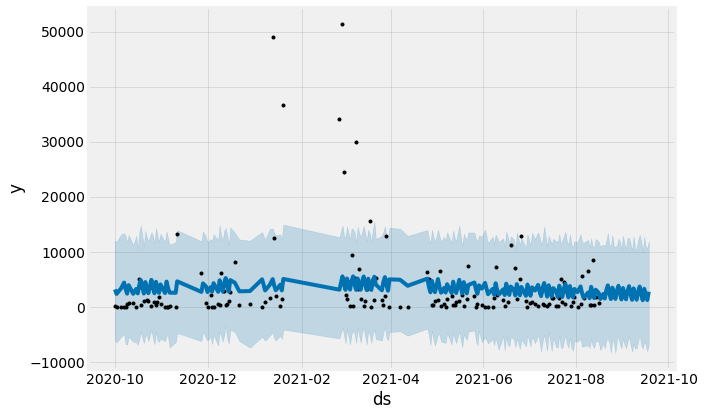

In [ ]:
# plotando as previsões
b.plot(forecast).savefig('forecast_non_stationary.png')

Além disso, também podemos plotar os componentes da nossa previsão.

Abaixo, podemos ver:

* Tendência Geral
* Tendência Semanal


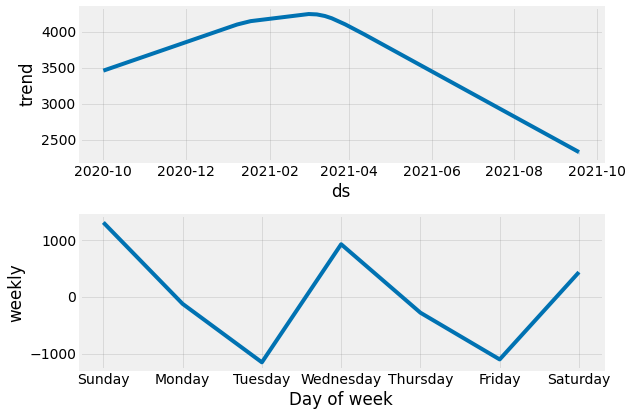

In [ ]:
# plotando componentes
b.plot_components(forecast).savefig('tendencias.png')

É percebido que o dia que mais ocorre vendas é na quarta-feira. Sendo que partindo para o fim da semana, tem menores vendas.
 

## Arima


In [144]:
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot


In [145]:
data_B0 = dt[dt['produto_descricao'] == 'B0']
data_B0.head()

,produto_descricao,produto_quantidade,produto_unidade_comercial,produto_valor_unitario_comercializacao,nota_data_emissao,ano_emissao,dia_emissao,mes_emissao
52,B0,2,UN,32.02,2021-06-10,2021,10,6
53,B0,60,UN,29.09,2021-02-28,2021,28,2
54,B0,60,UN,32.02,2021-05-08,2021,8,5
55,B0,60,UN,32.02,2021-07-24,2021,24,7
56,B0,120,UN,29.09,2021-03-29,2021,29,3


In [146]:
df_vendas_diarias = data_B0.groupby('dia_emissao')['produto_quantidade'].sum().reset_index()
df_vendas_diarias.sort_values(by='produto_quantidade', ascending=False)

,dia_emissao,produto_quantidade
25,26,63660
12,13,55894
27,28,53435
19,20,47807
8,9,45241
10,11,32175
21,22,30060
17,18,22310
18,19,22267
0,1,20438


In [147]:
#Média de quantidade vendida por dia

media_vendas = df_vendas_diarias.produto_quantidade.mean()
print(f"Média da quantidade de vendas do produto por dia: ${round(media_vendas)}")

Média da quantidade de vendas do produto por dia: $19443


In [148]:
#Diferença da quantidade de vendas do produto para cada dia
def get_diff(data):
    data['sales_diff'] = data.produto_quantidade.diff()
    data = data.dropna()
    
    return data

In [149]:
stationary_df = get_diff(df_vendas_diarias)
stationary_df

,dia_emissao,produto_quantidade,sales_diff
1,2,4086,-16352.0
2,3,10240,6154.0
3,4,835,-9405.0
4,5,5467,4632.0
5,6,7212,1745.0
6,7,416,-6796.0
7,8,12226,11810.0
8,9,45241,33015.0
9,10,17121,-28120.0
10,11,32175,15054.0


### **Modelagem**

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [151]:


def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    mape = MAPE(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('MAPE', mape)
    print('__________________________________')
    

In [152]:
stationary_df.shape

(30, 3)

### **Analisando Lags**

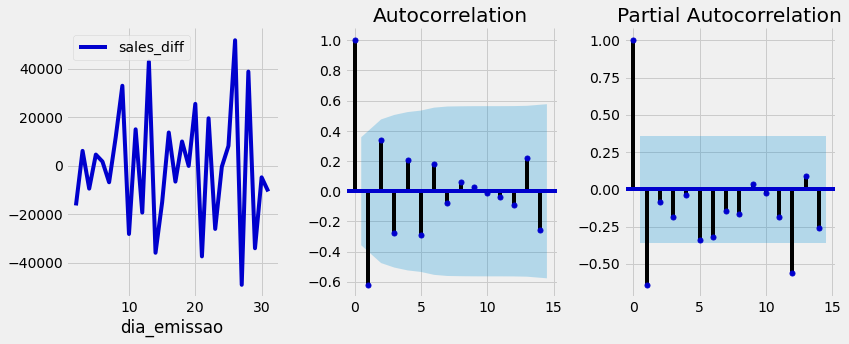

In [153]:
from statsmodels.graphics import tsaplots
plt.style.use('fivethirtyeight')
import statsmodels.tsa.api as smt

dt_data = stationary_df.set_index('dia_emissao').drop('produto_quantidade', axis=1)
dt_data.dropna(axis=0)

layout = (1, 3)
                                                                                                                                                                                                                    
raw  = plt.subplot2grid(layout, (0, 0))
acf  = plt.subplot2grid(layout, (0, 1))
pacf = plt.subplot2grid(layout, (0, 2))
    
dt_data.plot(ax=raw, figsize=(12, 5), color='mediumblue')
smt.graphics.plot_acf(dt_data, lags=14, ax=acf, color='mediumblue')
smt.graphics.plot_pacf(dt_data, lags=14, ax=pacf, color='mediumblue')
sns.despine()
plt.tight_layout()

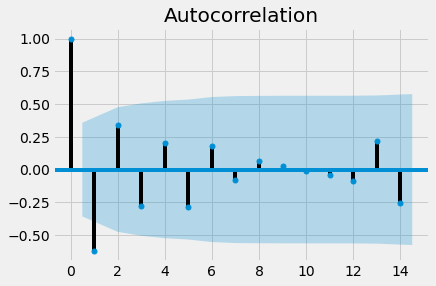

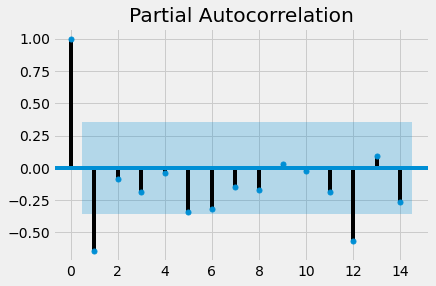

In [154]:
##gráfico de autocorrelação 
fig = tsaplots.plot_acf(dt_data, lags=14)
plt.show()

#gráfico de autocorrelação parcial 
fig = tsaplots.plot_pacf(dt_data, lags=14)
plt.show()

Escolhido um período de retrospectiva de 12 dias, para criar um dataframe em série temporal. Portanto, será gerado um data frame que possui 13 colunas, 1 coluna para cada um dos 12 dias e a coluna para nossa variável dependente, diferença da quantidade de vendas do produto. 

In [155]:
#criando um dataframe para transformação de série temporal 
def generate_supervised(data):
    supervised_df = data.copy()
    
    #criar coluna com lags para os últimos 12 dias
    for i in range(1,13):
        col_name = 'lag_' + str(i)
        supervised_df[col_name] = supervised_df['sales_diff'].shift(i)
    
    #excluir valores nulos
    supervised_df = supervised_df.dropna().reset_index(drop=True)
    
    supervised_df.to_csv('model_df.csv', index=False)
    
    return supervised_df

In [156]:
model_df = generate_supervised(stationary_df)
model_df

,dia_emissao,produto_quantidade,sales_diff,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
0,14,20034,-35860.0,42998.0,-19279.0,15054.0,-28120.0,33015.0,11810.0,-6796.0,1745.0,4632.0,-9405.0,6154.0,-16352.0
1,15,5040,-14994.0,-35860.0,42998.0,-19279.0,15054.0,-28120.0,33015.0,11810.0,-6796.0,1745.0,4632.0,-9405.0,6154.0
2,16,18781,13741.0,-14994.0,-35860.0,42998.0,-19279.0,15054.0,-28120.0,33015.0,11810.0,-6796.0,1745.0,4632.0,-9405.0
3,17,12267,-6514.0,13741.0,-14994.0,-35860.0,42998.0,-19279.0,15054.0,-28120.0,33015.0,11810.0,-6796.0,1745.0,4632.0
4,18,22310,10043.0,-6514.0,13741.0,-14994.0,-35860.0,42998.0,-19279.0,15054.0,-28120.0,33015.0,11810.0,-6796.0,1745.0
5,19,22267,-43.0,10043.0,-6514.0,13741.0,-14994.0,-35860.0,42998.0,-19279.0,15054.0,-28120.0,33015.0,11810.0,-6796.0
6,20,47807,25540.0,-43.0,10043.0,-6514.0,13741.0,-14994.0,-35860.0,42998.0,-19279.0,15054.0,-28120.0,33015.0,11810.0
7,21,10452,-37355.0,25540.0,-43.0,10043.0,-6514.0,13741.0,-14994.0,-35860.0,42998.0,-19279.0,15054.0,-28120.0,33015.0
8,22,30060,19608.0,-37355.0,25540.0,-43.0,10043.0,-6514.0,13741.0,-14994.0,-35860.0,42998.0,-19279.0,15054.0,-28120.0
9,23,4029,-26031.0,19608.0,-37355.0,25540.0,-43.0,10043.0,-6514.0,13741.0,-14994.0,-35860.0,42998.0,-19279.0,15054.0


In [157]:
features_modelo = ['produto_unidade_comercial', 'produto_valor_unitario_comercializacao', 
                   'nota_data_emissao']

In [158]:
X = model_df.drop(['produto_quantidade'], axis=1)  

y = model_df['produto_quantidade'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

Testando se os dados são estacionários

In [159]:
from statsmodels.tsa.stattools import adfuller

In [160]:
test_result=adfuller(model_df['produto_quantidade'])

In [161]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['Estatística de teste ADF','p-value','#Lags Used','Número de observações']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("forte evidência contra a hipótese nula (Ho), rejeite a hipótese nula. Os dados são estacionários")
    else:
        print("evidência fraca contra a hipótese nula, indicando que é não estacionária")

adfuller_test(model_df['produto_quantidade'])

Estatística de teste ADF : -0.5762218825423895
p-value : 0.876264898584719
#Lags Used : 7
Número de observações : 10
evidência fraca contra a hipótese nula, indicando que é não estacionária


Evidenciamos que nosso $\text{p-value} = 0.87$, desse modo não é possível rejeitamos a $H_0$ porque nosso níve de confiança é de apenas 13%

In [162]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

In [163]:
model= sm.tsa.ARIMA(model_df['produto_quantidade'],order=(1,1,1)) 
model_fit=model.fit()

In [164]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARIMA Model Results                               
================================================================================
Dep. Variable:     D.produto_quantidade   No. Observations:                   17
Model:                   ARIMA(1, 1, 1)   Log Likelihood                -192.235
Method:                         css-mle   S.D. of innovations          19405.841
Date:                  Sat, 28 May 2022   AIC                            392.471
Time:                          20:41:24   BIC                            395.803
Sample:                               1   HQIC                           392.802
                                                                                
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       -372.9955   2981.837     -0.125      0.902   -6217.289    5471.298
ar.L1.D.produto_quantidade    -0.6572      0.303     -2.169      0.048      -1.251      -0.063
ma.L1.D.produto_quantidade     0.0247      0.463      0.053      0.958      -0.884       0.933
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5216           +0.0000j            1.5216            0.5000
MA.1          -40.5332           +0.0000j           40.5332            0.5000
-----------------------------------------------------------------------------
"""

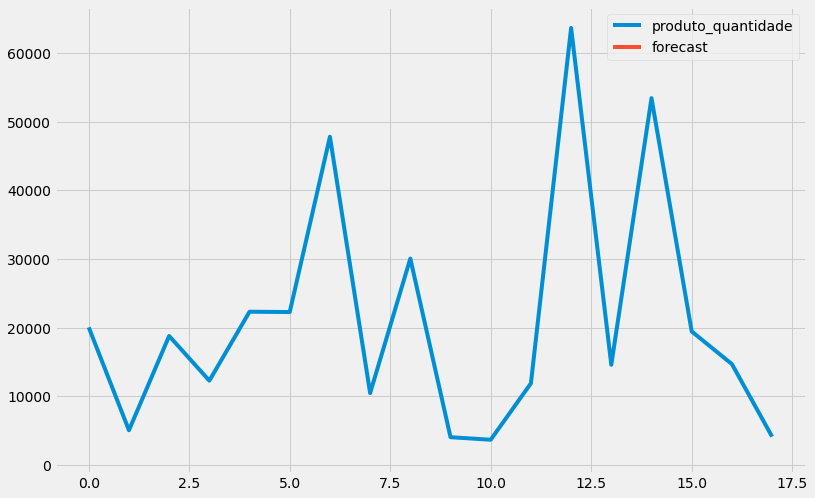

In [165]:
model_df['forecast']=model_fit.predict(start=17,end=107,dynamic=True)
model_df[['produto_quantidade','forecast']].plot(figsize=(12,8))

No gráfico acima mostra a relação do forecast com